# Project Info
### Predict the percentage of an student based on the no. of study hours.


## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Load & Explore data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()
shape = data.shape
print(f'\n Number of Rows = {shape[0]}\n Number of columns = {shape[1]} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes

 Number of Rows = 25
 Number of columns = 2 


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


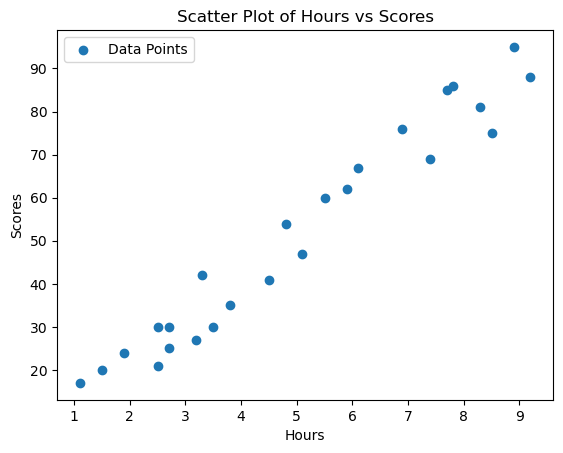

In [5]:
plt.scatter(data['Hours'], data['Scores'],label='Data Points')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter Plot of Hours vs Scores')
plt.legend()
plt.show()

- There is a Positive linear relation between number of hours studied and scores achieved

## Model Training

In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
# Linear Regression Model
lr = LinearRegression()

# model training
lr.fit(x_train, y_train)

# model test
y_pred = lr.predict(x_test)

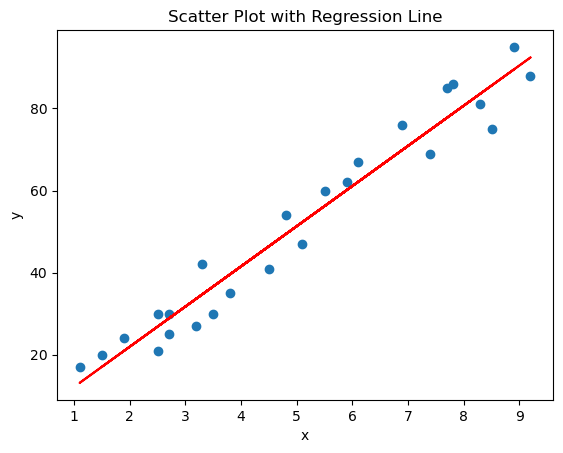

In [9]:
# visualize the regression in scatter plot
l = lr.coef_ * x + lr.intercept_

plt.scatter(x, y)
plt.plot(x, l, color='red')  # Adding the regression line

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot with Regression Line")

plt.show()

In [10]:
print('Accuracy: ', lr.score(x_test, y_test)*100,"%")
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)

Accuracy:  95.68211104435257 %
Intercept:  2.370815382341881
Coefficient:  [9.78856669]


- this calculations means that if a student studies 1 hour more than they previously studied, he can expect to achieve 9.78% increase in his previous score 

In [11]:
#comparing Actual Vs Predicted values 
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


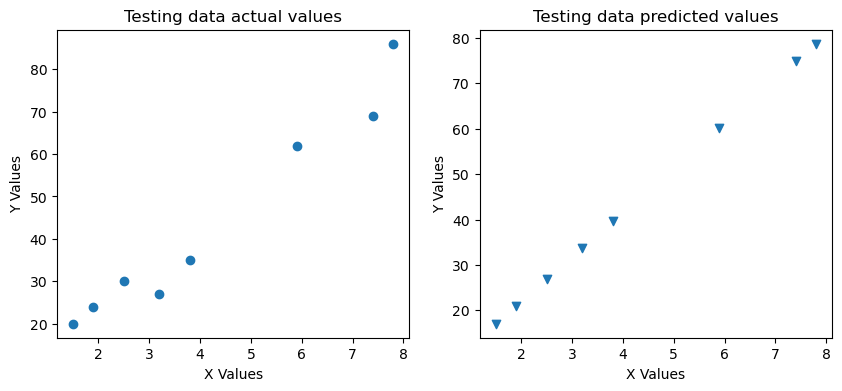

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(x_test,y_test)
ax[0].set_xlabel('X Values')
ax[0].set_ylabel('Y Values')
ax[0].set_title('Testing data actual values')

ax[1].scatter(x_test,y_pred,marker='v')
ax[1].set_xlabel('X Values')
ax[1].set_ylabel('Y Values')
ax[1].set_title('Testing data predicted values')

plt.show()

## Evaluating the Algorithm

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
